#**The Ipynb Guide for Beginner : First_Steps_to_AI**



*   #### **What is Ipynb ?**
*   #### Ipynb or Interactive Python Notebook, is a document designed to help those who work with python language, to, write, add text and execute pieces of code separate blocks to organize their work and easily figure out errors and problems


#### Cell types :


1.   #### Code Cell : Where you can run python code
2.   #### Text Cell : Where you can write text and comments, like this one


In [1]:
#This is a code cell
print('Hello from Co-Lab')

Hello from Co-Lab


#### Lets practice some a little now


#### First, we will load librairies that we will be using in this project
#### When we load a library, we use the keyword **import**, and then we use an **alias**, so when we want to use function from a certain library, we use **alias. function_name**

In [0]:
import pandas as pd #pandas is a software library  for data manipulation and analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Seaborn and Matplotlib is a plotting and visualization library


#### We will import our data from github, so we will provide the link for the .csv file, and then we will store them in a **Data frame**
#### **Data frame** : is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column.


In [0]:
data_url='https://raw.githubusercontent.com/BadriAhmed/First_Steps_toAI/master/glass.csv' # link for our data

In [0]:
df = pd.read_csv(data_url) # we use the alias for pandas wich is pd, and we read the file from the provided link
#df = pd.read_csv('glass.csv')

In [0]:
from google.colab import files
uploaded = files.upload() #upload the .json file to the colab

Saving glass.csv to glass.csv


In [0]:
df.tail(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
204,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [0]:
df.shape

(214, 10)

#### About the dataset : Glass Classification 
#####**Attribute Information**:

*   RI: refractive index
*   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
*Mg: Magnesium
*Al: Aluminum
*Si: Silicon
*K: Potassium
*Ca: Calcium
*Ba: Barium
*Fe: Iron
*Type of glass: (class attribute) : 
1.   building_windows_float_processed
2.   building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware 
7. headlamps

#### Our Task is to create a model who is able to predict the glass type based on its attributes

### **1. Exploring our Data**

#### **Shape, Describe, Head, Tail and Null values count**



In [0]:
df.shape #Number of rows and columns, in a 2D array (our case)

(214, 10)

In [0]:
df.isnull().sum() # We will see now the total of null values in each row using 'isnull' to identify null values, and 'sum' to calculate the total

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [0]:
df.head() # head() function show us the first 5 rows of our dataframe, if you want to see 10 rows for example use df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
df.tail() # tail() function show us the first 5 rows of our dataframe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [0]:
df.describe() # describe Generate descriptive statistics that summarize the dataset distribution, excluding null values.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### **Plotting and visualisation**
For more info about char types, you can [check this website](https://365datascience.com/chart-types-and-how-to-select-the-right-one/)

In [0]:
#First, we will count each target variable using Counter 
from collections import Counter
Counter(df['Type'])

Counter({1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29})

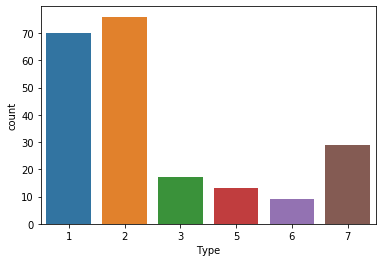

In [0]:
#Now we will use a barplot to diplay the reasult using Seaborn
sns.countplot(x='Type', data=df)

#### Next, we will plot a boxplot for each column against target variable to check for outliers
#### **What is an Outlier?** : it's been an observation point that is distant from other observations


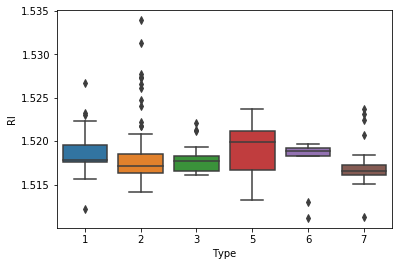

In [0]:
sns.boxplot('Type', 'RI', data =df)

#### Next, we will separate the Target values from Features values, and in our

In [0]:
X= df.iloc[:,:9]
y = df.Type

#### Now, we are going to standardize the features, in other words, we will simply calculate a new value:
#### **NewValue = (OldValue - Mean) / Standard Deviation**

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Next we will split our data into **Train** and **Test** data as **80%/20% Split** Random_state is used to shuffle the data while splitting, so we don't end up with test data with only 1 or 2 Target Values


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=250)

### **2.Modeling**

#### We will be using a machine learning algorithm called **'Random Forest'**, which is based on **'Decision Trees'** ([Use this link for more details](https://towardsdatascience.com/understanding-random-forest-58381e0602d2))

In [0]:
#First we will try with 50 decision tree, and a Max depth of 5
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,max_depth=5)
#Here we train our model
model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#And finally, we use the model , and store them on predict variable
predict=model.predict(x_test)

In [0]:
#Now we test the accuracy of our model
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(y_test,predict))

0.6744186046511628


#### In our first try, we obtained 68.51% accuracy, let's try and tune our model a little



In [0]:
#Now, we will use 300 decision tree, with a Max depth of 20
model2 = RandomForestClassifier(n_estimators=300,max_depth=20)
model2.fit(x_train, y_train)
predict2=model2.predict(x_test)

In [0]:
print(accuracy_score(y_test,predict2))

0.6511627906976745


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict2)

array([[ 9,  1,  1,  0,  0,  0],
       [ 3, 11,  0,  0,  1,  1],
       [ 2,  3,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  5]])

#### Lets change the algorithm. We will be using XGBoost, another tree based algorithm and lets see the results

In [0]:
from xgboost import XGBClassifier

In [0]:
model3 = XGBClassifier(n_estimators=100,max_depth=10,random_state=10)
#Here we train our model
model3.fit(x_train, y_train)
#And finally, we use the model , and store them on predict2 variable
predict2=model3.predict(x_test)

In [0]:
print(accuracy_score(y_test,predict2))

0.7441860465116279


#### Now we got 72.22% accuracy, that's better, but we can certainly do better, why don't you try yourself? Use other algorithm maybe? Or reduce the number of your features using PCA? Go ahead, the ground is yours!
